<a href="https://colab.research.google.com/github/Venusandjupiter/MachineLearning/blob/main/CNN/AlexNet/AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# A variant of AlexNet for FashionMNIST
import train
import net
import dataloader
import torch
import torchinfo

Path = './Dataset'

Device = 'cuda' if torch.cuda.is_available() else 'cpu'

print(torch.__version__)

if Device=='cuda':
    !nvidia-smi


1.13.0+cu116
Mon Jan  9 16:51:31 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    50W / 400W |      3MiB / 40536MiB |     25%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                           

In [3]:
Net = net.AlexNet()
train_data = dataloader.GetFashMNIST(path=Path,download=True,train=True)
val_data = dataloader.GetFashMNIST(path=Path,download=True,train=False)
train_iter = dataloader.iter_transform(dataset=train_data,batch_size=2048,shuffle=True)
val_iter = dataloader.iter_transform(dataset=val_data,batch_size=2048,shuffle=False)

In [4]:
torchinfo.summary(Net, (1, 1, 224, 224))

Layer (type:depth-idx)                   Output Shape              Param #
AlexNet                                  [1, 10]                   --
├─Sequential: 1-1                        [1, 256, 5, 5]            --
│    └─Conv2d: 2-1                       [1, 96, 54, 54]           11,712
│    └─ReLU: 2-2                         [1, 96, 54, 54]           --
│    └─MaxPool2d: 2-3                    [1, 96, 26, 26]           --
│    └─Conv2d: 2-4                       [1, 256, 26, 26]          614,656
│    └─ReLU: 2-5                         [1, 256, 26, 26]          --
│    └─MaxPool2d: 2-6                    [1, 256, 12, 12]          --
│    └─Conv2d: 2-7                       [1, 384, 12, 12]          885,120
│    └─ReLU: 2-8                         [1, 384, 12, 12]          --
│    └─Conv2d: 2-9                       [1, 384, 12, 12]          1,327,488
│    └─ReLU: 2-10                        [1, 384, 12, 12]          --
│    └─Conv2d: 2-11                      [1, 256, 12, 12]       

Running on: A100-SXM4-40GB
=============================epochs:1========================================
train loss:1.753,train acc:41.01%, val_acc:68.88%
=============================epochs:2========================================
train loss:0.697,train acc:73.44%, val_acc:76.58%
=============================epochs:3========================================
train loss:0.525,train acc:79.99%, val_acc:82.31%
=============================epochs:4========================================
train loss:0.431,train acc:83.69%, val_acc:84.07%
=============================epochs:5========================================
train loss:0.366,train acc:86.13%, val_acc:86.35%
=============================epochs:6========================================
train loss:0.323,train acc:87.88%, val_acc:86.98%
=============================epochs:7========================================
train loss:0.302,train acc:88.56%, val_acc:88.59%
=============================epochs:8========================================

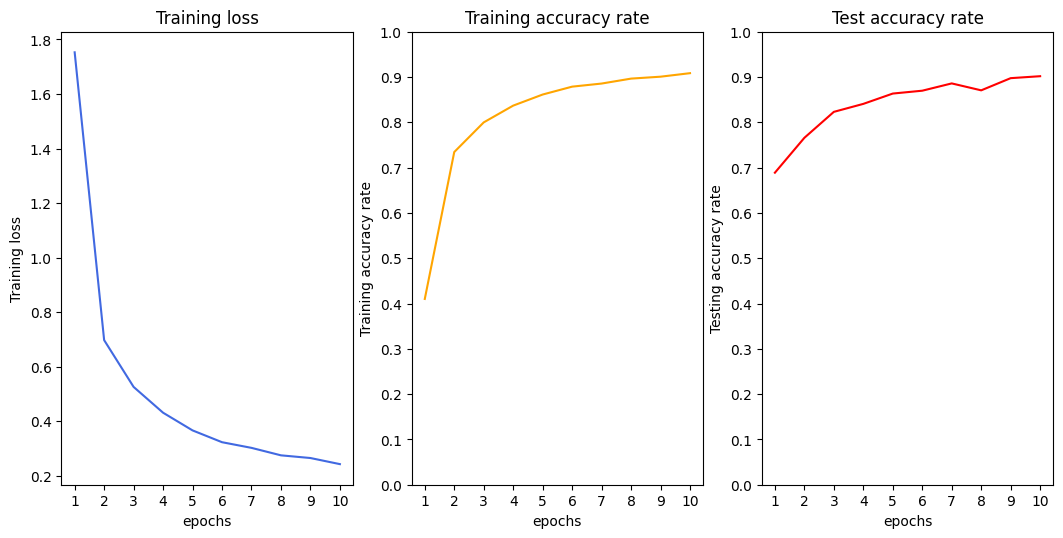

In [5]:
loss_fn = torch.nn.CrossEntropyLoss()
train.train_loop(net=Net,loss_fn=loss_fn,num_epochs=7,learning_rate=1e-3,train_iter=train_iter,val_iter=val_iter,device=Device)

In [6]:
torch.save(Net.cpu(),'./AlexNet_cpu.pt')
torch.save(Net.cuda(),'./AlexNet_gpu.pt')